In [1]:
!nvidia-smi

Fri Jul 11 16:02:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P0             44W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [2]:
%pip install -Uqqq pip --progress-bar off
%pip install -qqq transformers==4.53.2 --progress-bar off
%pip install -qqq accelerate==1.8.1 --progress-bar off
%pip install -qqq bitsandbytes==0.46.1 --progress-bar off

In [79]:
from transformers import BitsAndBytesConfig
import torch
from transformers import pipeline
from PIL.Image import Image
from PIL.Image import open as open_image, Resampling
from IPython.display import display, Markdown

In [2]:
MODEL = "google/medgemma-27b-it"

In [3]:
model_kwargs = dict(
    torch_dtype=torch.bfloat16,
    device_map="auto",
    quantization_config=BitsAndBytesConfig(load_in_4bit=True),
)

In [4]:
pipe = pipeline("image-text-to-text", model=MODEL, model_kwargs=model_kwargs)
pipe.model.generation_config.do_sample = False

config.json:   0%|          | 0.00/3.21k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

model-00003-of-00012.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00008-of-00012.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00007-of-00012.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00004-of-00012.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00005-of-00012.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00001-of-00012.safetensors:   0%|          | 0.00/4.85G [00:00<?, ?B/s]

model-00002-of-00012.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00006-of-00012.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00009-of-00012.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00010-of-00012.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00011-of-00012.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00012-of-00012.safetensors:   0%|          | 0.00/462M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/12 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Device set to use cuda:0


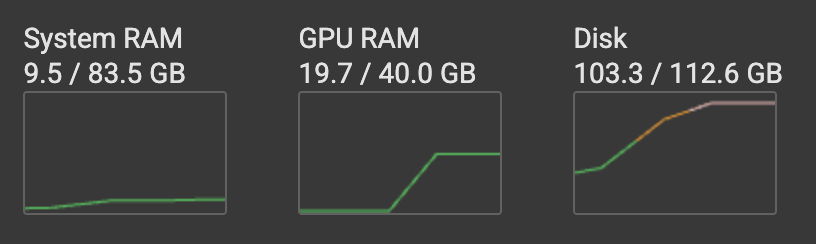

In [18]:
# Resource usage

In [70]:
def create_messages(
    prompt: str,
    role_instruction: str = "You are a helpful medical assistant.",
    images: list[Image] = [],
) -> list[dict]:
    system_instruction = (
        f"SYSTEM INSTRUCTION: think silently if needed. {role_instruction}"
    )
    user_contents = [{"type": "text", "text": prompt}]
    for image in images:
        user_contents.append({"type": "image", "image": image})
    return [
        {"role": "system", "content": [{"type": "text", "text": system_instruction}]},
        {"role": "user", "content": user_contents},
    ]

In [48]:
BACK_PAIN_PROMPT = """
Hello. I’m in my mid-thirties and for the past 2 months I’ve experienced an on-off pain in my back.
Last month the pain started in my lower back and in the span of 2-3 nights progressed to my mid back.
The pain is most prominent after I’ve been asleep for few hours. It also hurts around my ribs in the front.
In addition I had difficulty breathing similar to not being able to take a breath.

This month the pain started in my bid back but with the same level of pain, front and back.

In both instances, this happens about a week before my period is due.
I also exercise in the gym and use a Hypertrophy style of training which includes squats, deadlifts and bench pressing.
I don’t take any medication or steroids. The only supplements I take are whey protein, L-Carnitine, Collagen and Cranberry extract.

What is the reason for my back pain?
""".strip()

In [53]:
%%time
output = pipe(text=create_messages(BACK_PAIN_PROMPT), max_new_tokens=2048)

CPU times: user 4min, sys: 0 ns, total: 4min
Wall time: 3min 59s


In [54]:
response = output[0]["generated_text"][-1]["content"]
print(response)

Okay, I understand. You're a woman in your mid-thirties experiencing recurring back pain (lower, then mid, now both front and back) that worsens at night, is associated with difficulty breathing, and seems to correlate with your menstrual cycle. You also engage in hypertrophy-style weight training. Let's break down the potential causes and what might be going on.

**Key Symptoms & Information:**

*   **Location:** Started lower back, progressed to mid-back, now involves both front (rib area) and back.
*   **Timing:** Occurs cyclically, about a week before menstruation.
*   **Onset/Progression:** On-off pain over 2 months, worsening at night (after a few hours of sleep).
*   **Associated Symptoms:** Difficulty breathing (dyspnea).
*   **Activities:** Hypertrophy-style weight training (squats, deadlifts, bench press).
*   **Medications/Supplements:** No medications/steroids. Takes whey protein, L-Carnitine, Collagen, Cranberry extract.

**Potential Causes & Considerations:**

1.  **Muscu

In [82]:
def print_response(prompt: str, response: str, images: list[Image] = []):
    display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}"))
    for image in images:
        image_copy = image.copy()
        image_copy.thumbnail([300, 300], Resampling.LANCZOS)
        display(image_copy)
        print("")
    parts = response.split("<unused95>")
    if len(parts) == 1:
        display(Markdown(f"---\n\n**[ Answer ]**\n\n{parts[0]}\n\n---"))
        return
    thought, answer = parts
    thought = thought.replace("<unused94>thought\n", "")
    display(Markdown(f"---\n\n**[ Thinking ]**\n\n{thought}"))
    display(Markdown(f"---\n\n**[ Answer ]**\n\n{answer}\n\n---"))

In [60]:
print_response(BACK_PAIN_PROMPT, response)

---

**[ User ]**

Hello. I’m in my mid-thirties and for the past 2 months I’ve experienced an on-off pain in my back.
Last month the pain started in my lower back and in the span of 2-3 nights progressed to my mid back. 
The pain is most prominent after I’ve been asleep for few hours. It also hurts around my ribs in the front. 
In addition I had difficulty breathing similar to not being able to take a breath.

This month the pain started in my bid back but with the same level of pain, front and back.

In both instances, this happens about a week before my period is due. 
I also exercise in the gym and use a Hypertrophy style of training which includes squats, deadlifts and bench pressing. 
I don’t take any medication or steroids. The only supplements I take are whey protein, L-Carnitine, Collagen and Cranberry extract.

What is the reason for my back pain?

---

**[ Answer ]**

Okay, I understand. You're a woman in your mid-thirties experiencing recurring back pain (lower, then mid, now both front and back) that worsens at night, is associated with difficulty breathing, and seems to correlate with your menstrual cycle. You also engage in hypertrophy-style weight training. Let's break down the potential causes and what might be going on.

**Key Symptoms & Information:**

*   **Location:** Started lower back, progressed to mid-back, now involves both front (rib area) and back.
*   **Timing:** Occurs cyclically, about a week before menstruation.
*   **Onset/Progression:** On-off pain over 2 months, worsening at night (after a few hours of sleep).
*   **Associated Symptoms:** Difficulty breathing (dyspnea).
*   **Activities:** Hypertrophy-style weight training (squats, deadlifts, bench press).
*   **Medications/Supplements:** No medications/steroids. Takes whey protein, L-Carnitine, Collagen, Cranberry extract.

**Potential Causes & Considerations:**

1.  **Musculoskeletal Pain (Related to Exercise):**
    *   **Muscle Strain/Spasm:** Weight training, especially hypertrophy styles with heavy loads, can cause muscle strains or spasms in the back, ribs, and surrounding areas. This could explain the pain location.
    *   **Poor Form:** Improper technique during squats, deadlifts, or bench press could lead to strain on the back muscles, ligaments, or even intercostal muscles (around the ribs).
    *   **Overuse:** Pushing too hard or not allowing adequate recovery can lead to muscle soreness and pain.
    *   **However:** This doesn't fully explain the cyclical nature related to menstruation or the difficulty breathing. While muscle strain can be painful, it usually doesn't have a strong link to the menstrual cycle or cause significant breathing difficulty unless it involves the rib cage or diaphragm.

2.  **Menstrual Cycle Related Pain:**
    *   **Endometriosis:** This condition involves tissue similar to the uterine lining growing outside the uterus. It can cause pelvic pain, back pain, and sometimes pain radiating to the ribs or chest. Pain often worsens around menstruation. Difficulty breathing can occur if endometriosis affects the diaphragm or pleura, though this is less common.
    *   **Adenomyosis:** This occurs when the uterine lining grows into the muscular wall of the uterus. It typically causes heavy, painful periods and pelvic pain, but can also cause back pain.
    *   **Premenstrual Syndrome (PMS) / Premenstrual Dysphoria Disorder (PMDD):** While primarily associated with mood changes, bloating, and breast tenderness, some women experience muscle aches or back pain as part of PMS/PMDD. However, the severity and specific location (ribs, breathing difficulty) make this less likely as the sole explanation.
    *   **Ovarian Cysts:** Large cysts can sometimes cause pelvic or back pain, but usually not cyclical pain worsening before the period unless related to hormonal changes affecting the cyst.

3.  **Thoracic/Rib Related Issues:**
    *   **Costochondritis/Tietze Syndrome:** Inflammation of the cartilage connecting ribs to the sternum. This causes chest/rib pain, often sharp, and can be worsened by movement or pressure. It *could* explain the front rib pain, but less likely the back pain or cyclical nature.
    *   **Intercostal Muscle Strain:** Strain of the muscles between the ribs. Can cause pain with breathing or movement.
    *   **Rib Fracture/Stress Fracture:** Less likely without trauma, but possible with repetitive stress (like bench press).

4.  **Visceral Pain Referral:**
    *   Pain originating from internal organs can be referred to the back or chest. Conditions like kidney issues, pancreatitis, or gallbladder problems can cause back pain, but usually have other associated symptoms (nausea, vomiting, fever, changes in urine/stool). The cyclical nature makes these less likely as the primary cause.

5.  **Other Considerations:**
    *   **Spinal Issues:** Herniated disc, spinal stenosis, or arthritis could cause back pain, but the cyclical nature and front rib pain are less typical.
    *   **Anxiety/Stress:** Can manifest as muscle tension and pain, but usually doesn't explain the specific pattern or breathing difficulty.
    *   **Supplements:** While unlikely, some supplements *could* potentially interact or cause side effects, but the ones you listed (whey protein, L-Carnitine, Collagen, Cranberry extract) are generally considered safe and not typically associated with these symptoms.

**Connecting the Dots:**

*   **Cyclical Nature:** This is a strong clue pointing towards a gynecological cause like endometriosis or adenomyosis, or possibly PMS/PMDD with atypical symptoms. The timing (week before period) suggests hormonal influence.
*   **Location (Front & Back Ribs):** This is unusual for typical musculoskeletal back pain. It raises suspicion for referred pain or a condition affecting both the spine/muscles and potentially the chest wall/ribs. Endometriosis can sometimes cause referred pain to the chest/ribs.
*   **Difficulty Breathing:** This symptom needs careful consideration. It could be related to pain (splinting due to pain), anxiety, or a direct issue affecting the respiratory system (like pleurisy, though less likely without other signs). If endometriosis affects the diaphragm or pleura, it *could* cause breathing issues. Musculoskeletal pain involving the rib cage can also limit breathing.
*   **Weight Training:** While likely contributing to some muscle soreness or strain, it doesn't fully explain the cyclical pattern, front rib pain, or breathing difficulty. It's important to rule out other causes before attributing everything to exercise.

**Recommendations:**

1.  **Consult a Doctor:** This is crucial. Describe all your symptoms in detail, including the cyclical nature, location, timing, associated breathing difficulty, and exercise habits.
2.  **Gynecological Evaluation:** Given the strong link to your menstrual cycle, a gynecologist should be involved. They can assess for endometriosis, adenomyosis, or other gynecological conditions. An ultrasound or laparoscopy might be considered.
3.  **Musculoskeletal Assessment:** A physical therapist or sports medicine doctor could evaluate your form during exercises and assess for muscle strains, rib issues, or spinal problems.
4.  **Keep a Symptom Diary:** Track your pain levels, location, breathing difficulty, and where you are in your menstrual cycle. This can help identify patterns and provide valuable information to your doctor.
5.  **Review Exercise Technique:** Ensure proper form during squats, deadlifts, and bench press to minimize strain. Consider modifying exercises or reducing weight if pain is related to training.

**In summary:** The cyclical nature of your pain, combined with the unusual location (front and back ribs) and breathing difficulty, strongly suggests a possible gynecological cause like endometriosis, although musculoskeletal issues related to exercise could be contributing or co-existing. A thorough medical evaluation, including gynecological assessment, is necessary to determine the underlying cause and appropriate treatment. Do not self-diagnose or delay seeking professional medical advice.


---

## Hip X-Rays

source: https://old.reddit.com/r/AskDocs/comments/1lm64oh/how_severe_is_the_hip_oa_on_those_xrays/

In [73]:
HIP_XRAY_PROMPT = """
Hello
I’m male and 38 years old. Those are two xrays of my hip, that where made in january 2025, because I felt pain on the side of both hips for a few month.

Also an MRI was made in april 2025. The result was, that the cartilage covers are intact, no osteophytes, no cysts.

The doctor called it a beginning osteoarthritis, but thinks, joint replacements are probably not needed in the next years.
He thinks, the pain comes from the greater trochanter, even the mri showed no inflamation.

If compare the pictures with pictures of other hips, it seems to me, that the cartilage is almost gone and it‘s just a thin layer left.
Would you agree, that this is just a beginning OA or already a severe one?
This is actually what my physiotherapist said, he thinks, the joint is almost done.
""".strip()

In [74]:
%%time
hip_1 = open_image("hip-1.jpg")
hip_2 = open_image("hip-2.jpg")
output = pipe(
    text=create_messages(
        HIP_XRAY_PROMPT,
        role_instruction="You are an expert radiologist.",
        images=[hip_1, hip_2],
    ),
    max_new_tokens=2048,
)
response = output[0]["generated_text"][-1]["content"]

CPU times: user 3min 52s, sys: 0 ns, total: 3min 52s
Wall time: 3min 52s


---

**[ User ]**

Hello
I’m male and 38 years old. Those are two xrays of my hip, that where made in january 2025, because I felt pain on the side of both hips for a few month.

Also an MRI was made in april 2025. The result was, that the cartilage covers are intact, no osteophytes, no cysts.

The doctor called it a beginning osteoarthritis, but thinks, joint replacements are probably not needed in the next years. 
He thinks, the pain comes from the greater trochanter, even the mri showed no inflamation.

If compare the pictures with pictures of other hips, it seems to me, that the cartilage is almost gone and it‘s just a thin layer left. 
Would you agree, that this is just a beginning OA or already a severe one? 
This is actually what my physiotherapist said, he thinks, the joint is almost done.

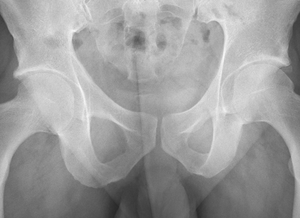

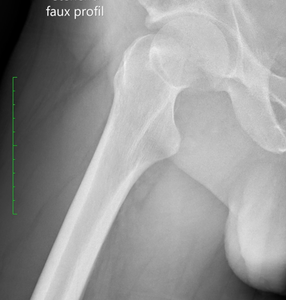

---

**[ Answer ]**

Okay, I understand. You're a 38-year-old male experiencing hip pain, and you're concerned about the severity of your osteoarthritis (OA) based on your X-rays, despite your doctor's assessment and MRI findings. You're also noting a discrepancy between your doctor's opinion and your physiotherapist's opinion.

Let's break this down:

1.  **Clinical Picture:** You have bilateral hip pain, which has been present for several months. This suggests a chronic issue.
2.  **Imaging:**
    *   **X-rays (January 2025):** These are the primary images for assessing OA. I need to carefully evaluate the joint space, bone density, presence of osteophytes, subchondral sclerosis, and cysts.
    *   **MRI (April 2025):** This was done to assess soft tissues and cartilage. The report states intact cartilage, no osteophytes, and no cysts. This seems contradictory to the X-ray findings typically associated with OA, which *should* show cartilage loss, osteophytes, and potentially cysts.
3.  **Doctor's Assessment:** Diagnosed "beginning osteoarthritis," believes joint replacement is not needed in the near future, and suspects the pain source is the greater trochanter (trochanteric bursitis or gluteal tendinopathy), despite the MRI showing no inflammation.
4.  **Physiotherapist's Assessment:** Believes the joint is "almost done" (severe OA).
5.  **Your Concern:** You feel the cartilage looks significantly diminished on the X-rays, suggesting more than just "beginning OA."

**Analysis of the X-rays:**

Let's examine the provided X-rays. These appear to be AP (anteroposterior) views of both hips.

*   **Image 1 (Top):** This is a standard AP view.
    *   **Joint Space:** I need to assess the space between the femoral head and the acetabulum. Is it narrowed? Is it uniform, or are there areas of more significant narrowing?
    *   **Osteophytes:** Are there bony spurs (osteophytes) forming at the joint margins?
    *   **Subchondral Sclerosis:** Is the bone just beneath the cartilage (subchondral bone) appearing denser or whiter than normal?
    *   **Cysts:** Are there any fluid-filled cavities (cysts) within the bone near the joint?
    *   **Femoral Head/Neck:** Is the femoral head round, or is it showing signs of deformity (e.g., collapse, flattening)?
    *   **Acetabulum:** Is the socket showing any signs of erosion or sclerosis?
*   **Image 2 (Bottom):** This is a magnified view of the left hip, likely focusing on the joint itself.
    *   This view allows for a closer look at the joint space and potential subtle changes.
    *   Again, I'll look for joint space narrowing, osteophytes, sclerosis, and cysts.

**Interpreting the Findings in Context:**

*   **The Discrepancy:** The MRI report stating "intact cartilage, no osteophytes, no cysts" directly contradicts the typical radiographic findings of OA, which *are* visible on X-rays. MRI is generally better for assessing cartilage and soft tissues, while X-rays are better for bone changes (osteophytes, sclerosis, cysts) and overall joint space.
*   **Possible Explanations for the Discrepancy:**
    *   **MRI Interpretation:** Perhaps the MRI findings were subtle, or the radiologist interpreted them differently. "Intact" cartilage on MRI can sometimes mean the cartilage layer is still present but may be thinned or have superficial defects not visible on X-ray. The absence of *large* osteophytes or cysts doesn't rule out early OA.
    *   **X-ray Interpretation:** The X-rays might show early signs of OA (e.g., mild joint space narrowing, minimal osteophytes) that are being interpreted as "beginning OA" by your doctor.
    *   **Pain Source:** Your doctor's suspicion of greater trochanter pathology (bursitis, tendinopathy) is common, especially with lateral hip pain. However, it's also possible that OA is contributing to or coexisting with the pain.
    *   **Radiologist vs. Clinician:** Sometimes, imaging findings don't perfectly correlate with clinical symptoms or the overall clinical picture.

**Assessing Severity Based on X-rays (General Principles):**

*   **Normal:** Wide, uniform joint space; smooth bone surfaces; no osteophytes.
*   **Mild OA:** Slight joint space narrowing, possibly small osteophytes.
*   **Moderate OA:** Moderate joint space narrowing, definite osteophytes, possible subchondral sclerosis.
*   **Severe OA:** Marked joint space narrowing (or complete loss), large osteophytes, significant sclerosis, possible cysts or bone deformity.

**Without seeing the actual X-rays, it's impossible for me to give a definitive assessment of severity.** However, based on your description and the fact that your physiotherapist feels the joint is "almost done," it suggests the X-rays likely show more than just minimal changes.

**What to Do Next:**

1.  **Obtain the X-rays:** If possible, get digital copies of your X-rays (both the AP and the magnified view).
2.  **Second Opinion (Radiologist):** Consult a radiologist specializing in musculoskeletal imaging. Show them the X-rays and the MRI report. Ask for their interpretation of the OA severity based on the X-rays and how it correlates (or doesn't) with the MRI findings. A radiologist can provide a more objective assessment of the radiographic changes.
3.  **Discuss with Doctor:** Share the radiologist's opinion and your concerns with your primary doctor or orthopedist. Discuss the discrepancy between the MRI and X-ray findings and the differing opinions of the doctor and physiotherapist.
4.  **Consider Clinical Correlation:** Remember that imaging is just one part of the diagnosis. Your symptoms, physical examination findings, and response to treatment are also crucial.

**In summary:** The discrepancy between the MRI report (showing intact cartilage, no osteophytes, no cysts) and the typical X-ray findings of OA (which *should* show cartilage loss, osteophytes, etc.) is concerning. While the MRI might be accurate regarding the *extent* of cartilage loss or the presence of large osteophytes, X-rays are the standard for assessing OA severity based on joint space narrowing and bone changes. If the X-rays show significant joint space narrowing or other signs of advanced OA, then the physiotherapist's assessment might be more aligned with the radiographic findings than the doctor's initial assessment based solely on the MRI. Getting a second opinion on the X-rays is the best next step to clarify the situation.

---

In [83]:
print_response(HIP_XRAY_PROMPT, response, images=[hip_1, hip_2])

## Lung X-Rays

source: https://old.reddit.com/r/AskDocs/comments/1lni99y/xray_came_back_normal_yeahi_still_wondering_what/

In [84]:
LUNG_XRAY_PROMPT = """
Xray came back normal (yeahi), still wondering what the thing in the red circle is?

As title says. I hava had breathing issues for a while already and sometimes it hurts in my right part of the lung when breathing.
So I am just wondering what the thing I circled is 🤔

So far I am happy that it came back normal. Still I like to understand the whole thing:)

I am female, 31 years old.
""".strip()

In [85]:
%%time
lung_xray = open_image("lung-xray.jpeg")
output = pipe(
    text=create_messages(
        LUNG_XRAY_PROMPT,
        role_instruction="You are an expert radiologist.",
        images=[lung_xray],
    ),
    max_new_tokens=2048,
)
response = output[0]["generated_text"][-1]["content"]

CPU times: user 2min 48s, sys: 0 ns, total: 2min 48s
Wall time: 2min 48s


---

**[ User ]**

Xray came back normal (yeahi), still wondering what the thing in the red circle is?

As title says. I hava had breathing issues for a while already and sometimes it hurts in my right part of the lung when breathing. 
So I am just wondering what the thing I circled is 🤔

So far I am happy that it came back normal. Still I like to understand the whole thing:)

I am female, 31 years old.

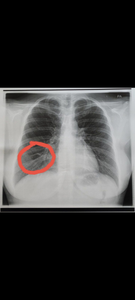

---

**[ Answer ]**

Okay, I understand. You're a 31-year-old female experiencing breathing issues and right-sided chest pain, and you're curious about a specific finding on your chest X-ray, even though the overall report was normal. You've circled an area on the right lung field.

Let's analyze the image and the clinical context.

**Image Analysis:**

The image is a standard posteroanterior (PA) chest X-ray. The red circle highlights an area in the right lower lung field, specifically near the diaphragm and the lower ribs.

Based on the image, the circled area appears to be a region of increased opacity compared to the surrounding lung tissue. It's somewhat ill-defined.

**Differential Diagnosis based on the image and symptoms:**

Given the location (right lower lung) and the symptoms (breathing issues, right-sided chest pain), here are some possibilities for what the circled area might represent, even if the overall X-ray was read as normal:

1.  **Subtle Pneumonia/Infection:** While the report was normal, sometimes early or mild pneumonia can present as subtle opacities. The location near the diaphragm could suggest a lower lobe pneumonia. However, typical pneumonia often shows more consolidation or air bronchograms.
2.  **Atelectasis:** Collapse or partial collapse of lung tissue. This can occur due to various reasons (mucus plug, compression). It often appears as increased density in the affected area.
3.  **Pleural Effusion:** Fluid collection in the pleural space. Small effusions can be subtle on X-ray, sometimes appearing as blunting of the costophrenic angle or increased density. The location is consistent with this.
4.  **Rib Lesion/Fracture:** A fracture or other lesion of the ribs could cause pain and might appear as a subtle abnormality on the X-ray, especially if it's a stress fracture or a healing fracture.
5.  **Costophrenic Angle Blunting:** This is often caused by a small pleural effusion, but can also be due to scarring or thickening of the pleura.
6.  **Diaphragmatic Eventration/Hernia:** A portion of the diaphragm might be abnormally elevated (eventration) or have a defect allowing abdominal contents to herniate into the chest. This can sometimes cause symptoms.
7.  **Superimposed Structures:** Sometimes, overlying structures like ribs, vessels, or even soft tissue can create an artifact or mimic a lung abnormality.
8.  **Early/Subtle Malignancy:** While less likely in a 31-year-old without significant risk factors, a small tumor could present as a nodule or mass.
9.  **Inflammatory/Infectious Process:** Conditions like pleurisy or localized inflammation could cause pain and potentially subtle changes.

**Why the X-ray might have been read as "normal":**

*   **Subtlety:** The finding might be very subtle, below the threshold for reporting as abnormal by the radiologist reading the film.
*   **Technical Factors:** X-ray technique (e.g., inspiration level, positioning) can influence the appearance.
*   **Reader Interpretation:** Different radiologists might interpret the same image slightly differently.
*   **Comparison:** Radiologists often compare current images to prior ones if available. If this is a new finding without prior comparison, it might be harder to assess.

**Next Steps & Recommendations:**

1.  **Correlation with Clinical Picture:** The most important thing is to correlate the X-ray finding with your symptoms. Breathing issues and right-sided pain are concerning.
2.  **Further Investigation:** Since the X-ray was normal but your symptoms persist, further investigation is warranted.
    *   **CT Scan:** A CT scan of the chest provides much more detailed imaging of the lungs, pleura, ribs, and mediastinum. It is much more sensitive than X-ray for detecting subtle abnormalities like small effusions, early pneumonia, atelectasis, small nodules, or rib lesions. This would be the most appropriate next step to evaluate the circled area and your symptoms.
    *   **Clinical Evaluation:** A thorough physical examination by your doctor is crucial. They will listen to your lungs, check for tenderness, and assess your overall condition.
    *   **Other Tests:** Depending on the suspected cause, other tests might be considered (e.g., blood tests for infection, pulmonary function tests).

**In Conclusion:**

The circled area on your X-ray represents a region of increased density in the right lower lung field. While the overall X-ray was reported as normal, the finding warrants further investigation, especially given your persistent symptoms. A CT scan of the chest is the recommended next step to better characterize this area and determine the underlying cause of your breathing issues and pain.

**Disclaimer:** As an AI, I cannot provide a definitive diagnosis. This information is for educational purposes and should not substitute professional medical advice. Please discuss these findings and the need for further investigation with your physician.

---

In [86]:
print_response(LUNG_XRAY_PROMPT, response, images=[lung_xray])

## Hearing loss

source: https://old.reddit.com/r/AskDocs/comments/1edfq8a/husband_farted_directly_into_my_ear/

In [90]:
HEARING_LOSS_PROMPT = """
Last night I (32F) told my husband (34M) to make sure to wake me up early
because I was supposed to do a lot of cooking for a family get together
I was hosting and I wanted to get a head start. He usually wakes up before me because
he goes into work earlier. Anyway, this morning I was abruptly awoken by
an extremely loud sound that totally shook me awake. After jumping up and
opening my eyes I realized what had happened, I was sleeping on my left side,
my husband squatted directly over my head, pulled his shorts down and positioned his bare ass
over my right ear and proceeded to fart directly into my eardrum, very loudly.
He was giggling hysterically when I woke up and thought it was very funny.
My ear hurt for about a minute after the incident, the pain is gone now but I feel like
my hearing is not at 100%. Is it possible I have an eardrum rupture from this?

Needless to say I am livid at my husband and am not talking to him today.
He still thinks this is all very funny and is not taking it seriously and keeps
making jokes about it, like saying if I don't want to listen to him anymore he can fart
into my other ear for me. He does a lot of stupid pranks like this but this is the first one
that has caused a potential injury. I would like to know if I should go to urgent care or
the hospital for this, and also what to tell the doctor? I know I should never lie to doctors
but in this case I am way too embarrassed to tell a doctor that I am married to a 34 year old child,
should I just say I had my ear up to a loud speaker by accident?
Also should I be concerned about bacteria from the fart causing an ear infection?
""".strip()

In [91]:
%%time
output = pipe(text=create_messages(HEARING_LOSS_PROMPT), max_new_tokens=2048)
response = output[0]["generated_text"][-1]["content"]

CPU times: user 2min 46s, sys: 0 ns, total: 2min 46s
Wall time: 2min 46s


In [92]:
print_response(HEARING_LOSS_PROMPT, response)

---

**[ User ]**

Last night I (32F) told my husband (34M) to make sure to wake me up early 
because I was supposed to do a lot of cooking for a family get together 
I was hosting and I wanted to get a head start. He usually wakes up before me because 
he goes into work earlier. Anyway, this morning I was abruptly awoken by 
an extremely loud sound that totally shook me awake. After jumping up and 
opening my eyes I realized what had happened, I was sleeping on my left side, 
my husband squatted directly over my head, pulled his shorts down and positioned his bare ass 
over my right ear and proceeded to fart directly into my eardrum, very loudly. 
He was giggling hysterically when I woke up and thought it was very funny. 
My ear hurt for about a minute after the incident, the pain is gone now but I feel like 
my hearing is not at 100%. Is it possible I have an eardrum rupture from this?

Needless to say I am livid at my husband and am not talking to him today. 
He still thinks this is all very funny and is not taking it seriously and keeps 
making jokes about it, like saying if I don't want to listen to him anymore he can fart 
into my other ear for me. He does a lot of stupid pranks like this but this is the first one 
that has caused a potential injury. I would like to know if I should go to urgent care or 
the hospital for this, and also what to tell the doctor? I know I should never lie to doctors 
but in this case I am way too embarrassed to tell a doctor that I am married to a 34 year old child, 
should I just say I had my ear up to a loud speaker by accident? 
Also should I be concerned about bacteria from the fart causing an ear infection?

---

**[ Answer ]**

Okay, I understand. This is a very unusual and distressing situation. Let's break down your concerns and figure out the best course of action.

**1. Potential Eardrum Rupture:**

*   **Symptoms:** You mentioned pain immediately after the incident, which has now subsided, but you suspect your hearing isn't 100%. These *can* be symptoms of a ruptured eardrum (tympanic membrane perforation), but they are not definitive. Other symptoms might include:
    *   Sudden, sharp ear pain that stops quickly.
    *   Feeling of fullness or pressure in the ear.
    *   Ringing in the ear (tinnitus).
    *   Dizziness or vertigo.
    *   Clear or bloody fluid draining from the ear.
*   **Mechanism:** A sudden, extremely loud noise or pressure change *can* rupture an eardrum. While a fart isn't typically considered a high-pressure event like an explosion, the proximity and directness into the ear canal could potentially cause trauma, especially if the pressure was significant.
*   **Urgency:** A ruptured eardrum usually heals on its own within a few weeks, but it can increase the risk of infection (otitis media). It's important to get it checked to confirm the diagnosis and rule out complications.

**2. Should You Seek Medical Attention?**

*   **Yes, you should see a doctor.** Given the potential for eardrum rupture and the change in your hearing, it's best to get a professional evaluation.
*   **Urgent Care vs. Hospital:** An urgent care clinic is likely sufficient for this. A hospital emergency room is usually reserved for more severe or acute emergencies. Unless you have severe pain, significant dizziness, or fluid drainage, urgent care is appropriate.

**3. What to Tell the Doctor (Addressing Embarrassment):**

*   **Honesty is generally the best policy with doctors for accurate diagnosis and treatment.** However, I completely understand your embarrassment.
*   **Option 1 (Modified Truth):** You could say you were startled by a very loud, sudden noise close to your ear. You don't have to specify the *source* of the noise. The key is that it was loud and close to your ear.
*   **Option 2 (Focus on the Injury):** Describe the symptoms: "I experienced a sudden, very loud noise directly in my ear. I had immediate pain, which has subsided, but now I feel like my hearing is muffled/reduced/different."
*   **Option 3 (If you feel comfortable):** If you feel the doctor is understanding and non-judgmental, you *could* briefly mention a prank gone wrong, but you are absolutely not obligated to share the full, embarrassing detail.
*   **What *not* to do:** Don't lie about other symptoms or medical history. Focus on the event and its effect on your ear.
*   **Example phrasing for the doctor:** "I woke up suddenly to a very loud noise right next to my ear. It caused immediate pain, which has gone away, but I'm concerned my hearing might be affected." Or, "I was startled by a sudden, loud sound near my ear, and I'm worried about potential damage."

**4. Bacterial Infection Concern:**

*   **Possible, but less likely:** While farts contain bacteria, the primary concern with a potential eardrum rupture is the opening it creates, which allows external bacteria to enter the middle ear and cause otitis media (middle ear infection). The bacteria *from* the fart itself are less of a direct concern than the general risk of infection due to the perforation.
*   **Doctor will assess:** The doctor will examine your ear canal and eardrum (using an otoscope) to look for signs of rupture or infection. They might also check your hearing.

**5. Addressing the Husband Situation:**

*   **Separate issue:** This is a separate issue from the medical concern, but it's important. His behavior is inappropriate and disrespectful.
*   **Communication:** Once the medical issue is addressed, you need to have a serious conversation with him about his pranks, boundaries, and respect for your feelings and well-being. This behavior is not acceptable, especially when it potentially causes harm.
*   **Consider Counseling:** If this pattern of behavior continues or escalates, couples counseling might be beneficial.

**In Summary:**

1.  **See a doctor (urgent care is fine).**
2.  **Describe the event as a sudden, loud noise near your ear, focusing on the symptoms (pain, hearing change).** You don't have to reveal the specific source if you're too embarrassed.
3.  **The doctor will examine your ear to check for rupture or infection.**
4.  **Address the husband's behavior separately and firmly.**

I hope this helps. Let me know if you have any other questions.


---